In [1]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif" 

SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
def pad_results(result_list):
    # pad the results to the same length so that can compute mean and std
    num_results = len(result_list)
    result_length = []

    for i in range(num_results):
        result_length.append(len(result_list[i]))

    max_length = max(result_length)

    for i in range(num_results):
        pad_length = max_length - result_length[i]
        result_list[i] = np.concatenate([result_list[i], result_list[i][-1] * np.ones(pad_length)])

    result_list = np.array(result_list)
    
    return result_list

In [8]:
seeds = [123, 231, 321]


method_list_1 = [
    'DySAT', 
    'EvolveGCN_O',
    'DyGraphTransformer_x',
    'DyGraphTransformer',
]


name_trans = {
    'DySAT': 'DySAT',
    'DyGraphTransformer': 'DGT',
    'EvolveGCN_O': 'EvolveGCN',
    'DyGraphTransformer_x': 'DGT (no pretrain)'
}

dataset_name_trans = {
    'wiki_classification': 'Wikipedia', 
    'reddit_classification': 'Reddit'
}

dataset_to_ind = {
    'wiki_classification':0, 
    'reddit_classification':1, 
}

datasets = ['wiki_classification', 'reddit_classification']   # change it back to 6

min_time_list = [4, 4]
max_time_list = [11, 11]


>>>  DySAT
5 [0.9204000000000001, 0.9384, 0.9435999999999999]
6 [0.9488888888888889, 0.9577777777777778, 0.9744444444444444]
7 [0.9229290177856112, 0.8618811087966672, 0.8689312610158628]
8 [0.96849173553719, 0.9544163223140496, 0.9829545454545454]
9 [0.963269054178145, 0.9670441791653912, 0.9428629731660035]
10 [0.9765473461470641, 0.9667607123964028, 0.9729324634103333]
11 [0.9588208077202723, 0.9401150109062067, 0.9649018441403925]
(7,) (7,) (7,)
>>>  EvolveGCN_O
5 [0.8916000000000001, 0.9124, 0.9308]
6 [0.8516666666666668, 0.9172222222222223, 0.9369444444444445]
7 [0.9184425572824868, 0.854350264380708, 0.8698926454093896]
8 [0.9616477272727273, 0.9106404958677685, 0.9544163223140496]
9 [0.9407203346597287, 0.9585756555453526, 0.9224568921538618]
10 [0.9570622465173689, 0.9337859284076883, 0.9704637630047611]
11 [0.9225989820873819, 0.9340339744860864, 0.9463943419922004]
(7,) (7,) (7,)
>>>  DyGraphTransformer_x
5 [0.9356, 0.9312, 0.9452]
6 [0.9105555555555556, 0.9194444444444445, 

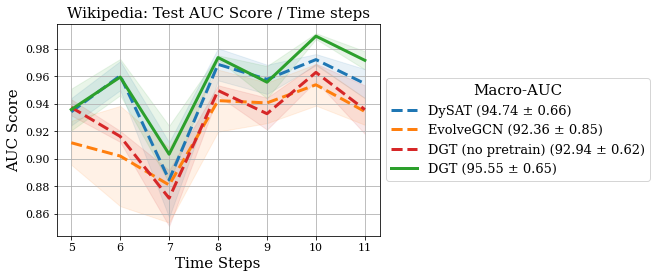

In [9]:
dataset = 'wiki_classification'
# dataset = 'reddit_classification'

# compute average score
fig, axs = plt.subplots(1)

name_to_color = {
    'DySAT': next(axs._get_lines.prop_cycler)['color'], # blue
    'EvolveGCN_O': next(axs._get_lines.prop_cycler)['color'], # green
    'DyGraphTransformer': next(axs._get_lines.prop_cycler)['color'], # red
    'DyGraphTransformer_x': next(axs._get_lines.prop_cycler)['color'], # red
}



############################################################################
############################################################################
############################################################################
for method_name in method_list_1:
    mean_result = []
    std_result = []
    time_x_axis = []
    print('>>> ', method_name)
    for time_step in range(min_time_list[dataset_to_ind[dataset]]+1, max_time_list[dataset_to_ind[dataset]]+1):
        best_score_list = []
        for seed in seeds:
            ############################################################################
            ################### DyGraphTransformer_two_stream ##########################
            ############################################################################
            if method_name == 'DyGraphTransformer':
                path = os.path.join('./all_logs/DyGraphTransformer/%s'%(dataset), 
                                    'Final_DyGraphTransformer_%s_seed_%d_time_%d_resid_node_cls_with_pretrain'%(dataset, seed, time_step),
                                    'result_%s.json'%dataset)
            elif method_name == 'DyGraphTransformer_x':
                path = os.path.join('./all_logs/DyGraphTransformer/%s'%(dataset), 
                                    'Final_DyGraphTransformer_%s_seed_%d_time_%d_resid_node_cls_without_pretrain'%(dataset, seed, time_step),
                                    'result_%s.json'%dataset)
            ############################################################################
            #################### DySAT, EvolveGCN_O ####################################
            ############################################################################
            else:
                path = os.path.join('./all_logs/%s/%s'%(method_name, dataset), 
                                    'Final_%s_%s_seed_%d_time_%d_resid_node_cls'%(method_name, dataset, seed, time_step),
                                    'result_%s.json'%dataset)
            if not os.path.exists(path):
                print(path, ' does not exist')
                continue
                
            with open(path, 'r') as f:
                result = json.load(f)
            test_epoch_auc = result['test_epoch_AUC']
            best_epoch = result['best_epoch']
            best_score_list.append(test_epoch_auc[best_epoch])
        
        print(time_step, best_score_list)
        if len(best_score_list) == 0:
            continue
        else:
            time_x_axis.append(time_step)
            mean_result.append(np.mean(best_score_list))
            std_result.append(np.std(best_score_list))
        
    mean_result = np.array(mean_result)
    std_result  = np.array(std_result)
    time_x_axis = np.array(time_x_axis)
        
    score = '%s (%.2f ± %.2f)'%(name_trans[method_name], 
                                np.mean(mean_result) * 100, 
                                np.std(std_result) * 100)
    print(time_x_axis.shape, mean_result.shape, std_result.shape)
    
    if method_name == 'DyGraphTransformer':
        linestyle = '-'
        linewidth = 3
    else:
        linestyle = '--'
        linewidth = 3
        
    axs.plot(time_x_axis, mean_result, label=score, linewidth=linewidth, linestyle=linestyle, color=name_to_color[method_name])
    axs.fill_between(time_x_axis, mean_result-std_result, mean_result+std_result ,alpha=0.1, color=name_to_color[method_name])
    
plt.title('%s: Test AUC Score / Time steps'%dataset_name_trans[dataset], fontsize=15)
axs.set_xlabel('Time Steps', fontsize=15)
axs.set_ylabel('AUC Score', fontsize=15)
axs.xaxis.get_major_locator().set_params(integer=True)
axs.grid(True)
fig.tight_layout()

# Shrink current axis by 20%
box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width*0.9, box.height])

# Put a legend to the right of the current axis
legend = axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Macro-AUC', fontsize=13)
plt.setp(legend.get_title(),fontsize=15)

plt.savefig('./%s_baselines.pdf'%dataset, bbox_inches = 'tight')

>>>  DySAT
5 [0.7722908093278462, 0.7421124828532236, 0.7613168724279835]
6 [0.8079999999999999, 0.814, 0.7951999999999999]
7 [0.8899521531100478, 0.8744019138755981, 0.881578947368421]
8 [0.8972649740221547, 0.9244191745907264, 0.9074600529359866]
9 [0.9149659863945578, 0.9138321995464853, 0.923721340388007]
10 [0.8967001981405274, 0.9043971955494589, 0.8926230757506477]
11 [0.948432944606414, 0.9287015826738859, 0.9537952936276551]
(7,) (7,) (7,)
>>>  EvolveGCN_O
5 [0.8353909465020576, 0.7722908093278463, 0.832647462277092]
6 [0.7275999999999999, 0.7476, 0.8116]
7 [0.810833902939166, 0.814935064935065, 0.7754613807245386]
8 [0.8677580629350063, 0.8762866385648467, 0.9220664640721498]
9 [0.8727009322247418, 0.8943688586545728, 0.9086041824137062]
10 [0.8871361073007165, 0.858824874256973, 0.8710943453741807]
11 [0.9208663057059558, 0.895850687213661, 0.902280299875052]
(7,) (7,) (7,)
>>>  DyGraphTransformer_x
5 [0.7325102880658436, 0.812071330589849, 0.7338820301783264]
6 [0.8076, 0.7

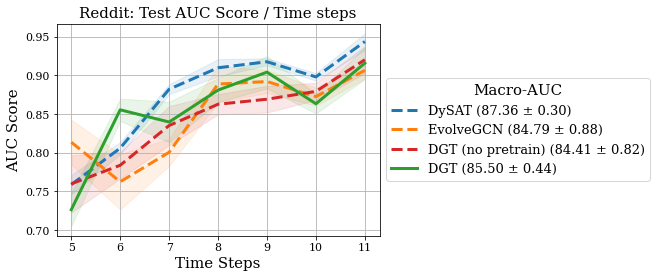

In [10]:
# dataset = 'wiki_classification'
dataset = 'reddit_classification'

# compute average score
fig, axs = plt.subplots(1)

name_to_color = {
    'DySAT': next(axs._get_lines.prop_cycler)['color'], # blue
    'EvolveGCN_O': next(axs._get_lines.prop_cycler)['color'], # green
    'DyGraphTransformer': next(axs._get_lines.prop_cycler)['color'], # red
    'DyGraphTransformer_x': next(axs._get_lines.prop_cycler)['color'], # red
}



############################################################################
############################################################################
############################################################################
for method_name in method_list_1:
    mean_result = []
    std_result = []
    time_x_axis = []
    print('>>> ', method_name)
    for time_step in range(min_time_list[dataset_to_ind[dataset]]+1, max_time_list[dataset_to_ind[dataset]]+1):
        best_score_list = []
        for seed in seeds:
            ############################################################################
            ################### DyGraphTransformer_two_stream ##########################
            ############################################################################
            if method_name == 'DyGraphTransformer':
                path = os.path.join('./all_logs/DyGraphTransformer/%s'%(dataset), 
                                    'Final_DyGraphTransformer_%s_seed_%d_time_%d_resid_node_cls_with_pretrain'%(dataset, seed, time_step),
                                    'result_%s.json'%dataset)
            elif method_name == 'DyGraphTransformer_x':
                path = os.path.join('./all_logs/DyGraphTransformer/%s'%(dataset), 
                                    'Final_DyGraphTransformer_%s_seed_%d_time_%d_resid_node_cls_without_pretrain'%(dataset, seed, time_step),
                                    'result_%s.json'%dataset)
            ############################################################################
            #################### DySAT, EvolveGCN_O ####################################
            ############################################################################
            else:
                path = os.path.join('./all_logs/%s/%s'%(method_name, dataset), 
                                    'Final_%s_%s_seed_%d_time_%d_resid_node_cls'%(method_name, dataset, seed, time_step),
                                    'result_%s.json'%dataset)
            if not os.path.exists(path):
                print(path, ' does not exist')
                continue
                
            with open(path, 'r') as f:
                result = json.load(f)
            test_epoch_auc = result['test_epoch_AUC']
            best_epoch = result['best_epoch']
            best_score_list.append(test_epoch_auc[best_epoch])
        
        print(time_step, best_score_list)
        if len(best_score_list) == 0:
            continue
        else:
            time_x_axis.append(time_step)
            mean_result.append(np.mean(best_score_list))
            std_result.append(np.std(best_score_list))
        
    mean_result = np.array(mean_result)
    std_result  = np.array(std_result)
    time_x_axis = np.array(time_x_axis)
        
    score = '%s (%.2f ± %.2f)'%(name_trans[method_name], 
                                np.mean(mean_result) * 100, 
                                np.std(std_result) * 100)
    print(time_x_axis.shape, mean_result.shape, std_result.shape)
    
    if method_name == 'DyGraphTransformer':
        linestyle = '-'
        linewidth = 3
    else:
        linestyle = '--'
        linewidth = 3
        
    axs.plot(time_x_axis, mean_result, label=score, linewidth=linewidth, linestyle=linestyle, color=name_to_color[method_name])
    axs.fill_between(time_x_axis, mean_result-std_result, mean_result+std_result ,alpha=0.1, color=name_to_color[method_name])
    
plt.title('%s: Test AUC Score / Time steps'%dataset_name_trans[dataset], fontsize=15)
axs.set_xlabel('Time Steps', fontsize=15)
axs.set_ylabel('AUC Score', fontsize=15)
axs.xaxis.get_major_locator().set_params(integer=True)
axs.grid(True)
fig.tight_layout()

# Shrink current axis by 20%
box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width*0.9, box.height])

# Put a legend to the right of the current axis
legend = axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Macro-AUC', fontsize=13)
plt.setp(legend.get_title(),fontsize=15)

plt.savefig('./%s_baselines.pdf'%dataset, bbox_inches = 'tight')

In [6]:
result.keys()

dict_keys(['id', 'best_epoch', 'best_valid_epoch_result', 'best_test_epoch_result', 'valid_epoch_AUC', 'test_epoch_AUC', 'epoch_train_loss'])

In [7]:
result.keys()

dict_keys(['id', 'best_epoch', 'best_valid_epoch_result', 'best_test_epoch_result', 'valid_epoch_AUC', 'test_epoch_AUC', 'epoch_train_loss'])